In [25]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from collections import Counter
import seaborn as sns

In [5]:
def accuracy(y_true, y_pred):
    '''
    Function to calculate accuracy
    Parameters: y_true - list of true values
            y_pred - list of predicted values
    Returns: accuracy score
'''
    correct_counter = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp)
    return correct_counter / len(y_true)

# Function to calculate true positive: if actual value is 1 and predicted value is 1
def true_positive(y_true, y_pred):
    tp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1)
    return tp

# Function to calculate true negative: if actual value is 0 and predicted value is 0
def true_negative(y_true, y_pred):
    tn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 0)
    return tn

# Function to calculate false positive: if actual value is 0 and predicted value is 1
def false_positive(y_true, y_pred):
    fp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1)
    return fp

# Function to calculate false negative: if actual value is 1 and predicted value is 0
def false_negative(y_true, y_pred):
    fn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)
    return fn

def accuracy_v2(y_true, y_pred):
    """
    Calculate the accuracy score using TP, TN, FP, and FN.
    
    Parameters:
    y_true (list): List of true labels
    y_pred (list): List of predicted labels
    
    Returns:
    float: Accuracy score
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    total = tp + tn + fp + fn
    correct = tp + tn
    
    accuracy_score = correct / total if total > 0 else 0
    
    return accuracy_score

In [6]:
# Simple example to test the functions above vs sklearn
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
print (metrics.accuracy_score(l1,l2))
print (accuracy(l1,l2))
print (true_positive(l1,l2))
print (true_negative(l1,l2))
print (false_positive(l1,l2))
print (false_negative(l1,l2))
print (accuracy_v2(l1,l2))

0.625
0.625
2
3
1
2
0.625


In [26]:
#If your data is skewed, accuracy is not a good metric. Do you know why?

#Let's say we have 1000 samples, 10 samples are positive and 990 samples are negative, and our #model predicted all samples as negative.

#- **Accuracy** = correct predictions / total predictions
#- **Accuracy** = 990 / 1000 = 99%

#But our model is not able to predict any positive sample. That's why we need other metrics to #evaluate our model:

#- Precision
#- Recall
#- F1 Score
#- ROC Curve
#- AUC Curve

If your data is skewed, accuracy is not a good metric. Do you know why?

Let's say we have 1000 samples, 10 samples are positive and 990 samples are negative, and our model predicted all samples as negative.

- **Accuracy** = correct predictions / total predictions
- **Accuracy** = 990 / 1000 = 99%

But our model is not able to predict any positive sample. That's why we need other metrics to evaluate our model:

- Precision
- Recall
- F1 Score
- ROC Curve
- AUC Curve

In [7]:
def precision(y_true, y_pred):
    '''
    Calculate the precision score.

    Parameters:
    y_true (list): List of true values.
    y_pred (list): List of predicted values.

    Returns:
    precision (float): Precision score.

    '''
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [8]:
print (precision(l1,l2))

0.6666666666666666


In [9]:
def recall(y_true, y_pred):
    '''
    Calculate the recall score.

    Parameters:
    y_true (list): List of true values.
    y_pred (list): List of predicted values.

    Returns:
    recall (float): Recall score.
    '''
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [10]:
print (recall(l1,l2))

0.5


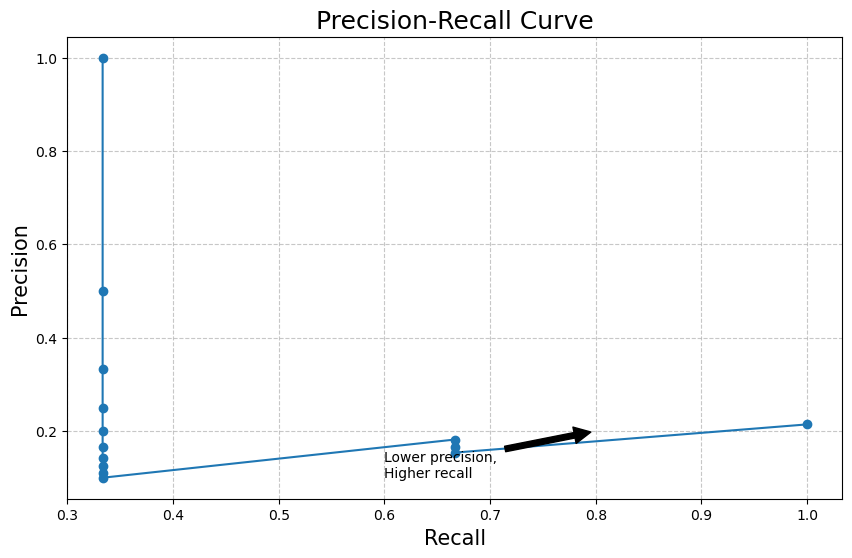

In [16]:
# # Precision-Recall Curve

#This cell calculates and plots the Precision-Recall curve for a binary classification problem. Here's what the code does:

#1. Sets up true labels and predicted probabilities.
#2. Defines a range of classification thresholds.
#3. Calculates precision and recall for each threshold.
#4. Plots the Precision-Recall curve.
#5. Adds annotations to explain the trade-off between precision and recall.

#The resulting plot helps visualize the model's performance across different classification thresholds, allowing you to choose an appropriate threshold based on your specific needs for precision vs. recall.

# Define true labels and predicted probabilities
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 
          0.17554844, 0.15952202, 0.03819563, 0.11639273, 0.079377, 
          0.08584789, 0.39095342, 0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905, 0.61977213, 0.33056815]

# Define thresholds for classification
thresholds = [0.0490937, 0.05934905, 0.079377, 0.08584789, 0.11114267, 
              0.11639273, 0.15952202, 0.17554844, 0.18521942, 0.27259048, 
              0.31620708, 0.33056815, 0.39095342, 0.61977213]

# Initialize lists to store precision and recall values
precisions = []
recalls = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    temp_prediction = [1 if x >= threshold else 0 for x in y_pred]
    
    # Calculate precision and recall
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    
    # Append results to lists
    precisions.append(p)
    recalls.append(r)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, marker='o')
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.title('Precision-Recall Curve', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations for better understanding
plt.annotate('Higher precision,\nLower recall', xy=(0.2, 0.8), xytext=(0.3, 0.9),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Lower precision,\nHigher recall', xy=(0.8, 0.2), xytext=(0.6, 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [17]:
# Given the importance of precision and recall, we can combine them to get a single metric: F1 Score
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
# F1 Score is the harmonic mean (https://en.wikipedia.org/wiki/Harmonic_mean) of precision and recall, which gives equal weight to both metrics.
# you can work out the formula for F1 Score using TP, FP, FN from the definitions of precision and recall
# F1 Score = 2TP / (2TP + FP + FN)
def f1(y_true, y_pred):
    '''
    Calculate the F1 score.

    Parameters:
    y_true (list): List of true values.
    y_pred (list): List of predicted values.

    Returns:
    f1 (float): F1 score.
    '''
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2.0 * p * r / (p + r)
    return score

In [18]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [20]:
print (f1(y_true, y_pred))
# sklearn also has a built-in function to calculate F1 Score
print (metrics.f1_score(y_true, y_pred))

0.5714285714285715
0.5714285714285714


In [21]:
#True Positive Rate (TPR) or recall is also known as sensitivity
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

In [22]:
#False positive rate And 1 - FPR is known as specificity or True Negative Rate or TNR
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [23]:
# Initialize lists to store True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_list, fpr_list = [], []

# Define true labels and predicted probabilities
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

# Define thresholds for ROC curve
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# Print lengths of input data and thresholds for verification
print(f"Lengths: y_true={len(y_true)}, y_pred={len(y_pred)}, thresholds={len(thresholds)}")

# Calculate TPR and FPR for each threshold
for thresh in thresholds:
    # Convert probabilities to binary predictions based on threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    
    # Calculate TPR and FPR for current threshold
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    
    # Append results to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)
    
    # Print results for each threshold
    print(f"Threshold: {thresh:.2f}, TPR: {temp_tpr:.4f}, FPR: {temp_fpr:.4f}")

Lengths: y_true=15, y_pred=15, thresholds=13
Threshold: 0.00, TPR: 1.0000, FPR: 1.0000
Threshold: 0.10, TPR: 1.0000, FPR: 0.9000
Threshold: 0.20, TPR: 1.0000, FPR: 0.7000
Threshold: 0.30, TPR: 0.8000, FPR: 0.6000
Threshold: 0.40, TPR: 0.8000, FPR: 0.3000
Threshold: 0.50, TPR: 0.8000, FPR: 0.3000
Threshold: 0.60, TPR: 0.8000, FPR: 0.2000
Threshold: 0.70, TPR: 0.6000, FPR: 0.1000
Threshold: 0.80, TPR: 0.6000, FPR: 0.1000
Threshold: 0.85, TPR: 0.4000, FPR: 0.1000
Threshold: 0.90, TPR: 0.4000, FPR: 0.0000
Threshold: 0.99, TPR: 0.2000, FPR: 0.0000
Threshold: 1.00, TPR: 0.0000, FPR: 0.0000


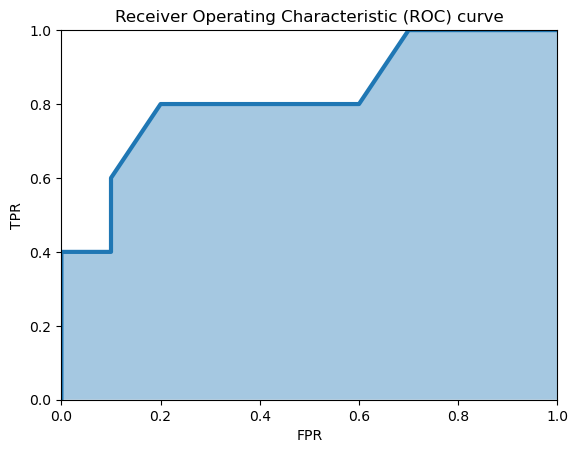

In [28]:
plt.fill_between(fpr_list,tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [29]:
# sklearn also has a built-in function to calculate AUC
print (metrics.roc_auc_score(y_true, y_pred))

0.8300000000000001


In [18]:
tp_list = []; fp_list = []
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    temp_tp = true_positive(y_true, temp_pred)
    temp_fp = false_positive(y_true, temp_pred)
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)
    print (thresh,temp_tp,temp_fp)

0 5 10
0.1 5 9
0.2 5 7
0.3 4 6
0.4 4 3
0.5 4 3
0.6 4 2
0.7 3 1
0.8 3 1
0.85 2 1
0.9 2 0
0.99 1 0
1.0 0 0


In [32]:
# function to calculate log loss
# log loss is a measure of how well a binary classification model is predicting the correct class.
# It is defined as the negative average of the log of the predicted probabilities for the true class.
# Closer to zero log loss is better
# log loss penalizes confident incorrect classifications more than confident correct classifications
def log_loss(y_true, y_proba):
    '''
    Calculate the log loss.

    Parameters:
    y_true (list): List of true values.
    y_proba (list): List of predicted probabilities.

    Returns:
    log_loss (float): Log loss.
    '''
    epsilon = 1e-15
    loss = []
    for yt, yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1 - epsilon) # You don't need this in the below example only if you have 0 or 1 
        temp_loss = - 1.0 * (yt * np.log(yp) + (1-yt) *np.log(1-yp)) # remember this is ln not log10
        loss.append(temp_loss)
        #print (temp_loss)
    return np.mean(loss)

In [33]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

0.49882711861432294

In [34]:
# sklearn also has a built-in function to calculate log loss
print (metrics.log_loss(y_true, y_proba))

0.49882711861432294


In [22]:
log_loss([1],[0.51])

0.6733445532637656

In [23]:
log_loss([0],[0.9])

2.302585092994046

In [24]:
log_loss([1],[0.999])

0.0010005003335835344

In [37]:
def macro_precision(y_true, y_pred):
    '''
    Calculate the macro precision score.

    Parameters:
    y_true (list): List of true values.
    y_pred (list): List of predicted values.

    Returns:
    precision (float): Macro precision score.
    '''
    classes = np.unique(y_true)
    precisions = []

    for class_ in classes:
        true_positives = np.sum((np.array(y_true) == class_) & (np.array(y_pred) == class_))
        predicted_positives = np.sum(np.array(y_pred) == class_)
        
        if predicted_positives > 0:
            precisions.append(true_positives / predicted_positives)
        else:
            precisions.append(0.0)

    return np.mean(precisions)

In [38]:
def micro_precision(y_true, y_pred):
    '''
    Calculate the micro precision score.

    Parameters:
    y_true (list): List of true values.
    y_pred (list): List of predicted values.

    Returns:
    precision (float): Micro precision score.
    '''
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    true_positives = np.sum(y_true == y_pred)
    total_predictions = len(y_pred)
    
    return true_positives / total_predictions if total_predictions > 0 else 0.0

In [47]:
def weighted_precision(y_true, y_pred):
    '''
    Calculate the weighted precision score.

    Parameters:
    y_true (list): List of true values.
    y_pred (list): List of predicted values.

    Returns:
    precision (float): Weighted precision score.
    '''
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    classes, class_counts = np.unique(y_true, return_counts=True)
    total_samples = len(y_true)
    
    weighted_sum = 0
    for class_, count in zip(classes, class_counts):
        true_positives = np.sum((y_true == class_) & (y_pred == class_))
        predicted_positives = np.sum(y_pred == class_)
        
        if predicted_positives > 0:
            class_precision = true_positives / predicted_positives
        else:
            class_precision = 0.0
        
        weighted_sum += count * class_precision
    
    return weighted_sum / total_samples

In [48]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [49]:
macro_precision(y_true, y_pred)

0.3611111111111111

In [55]:
# sklearn also has a built-in function to calculate precision
print (metrics.precision_score(y_true, y_pred, average="macro"))

0.3611111111111111


In [51]:
micro_precision(y_true, y_pred)

0.4444444444444444

In [56]:
# sklearn also has a built-in function to calculate precision
print (metrics.precision_score(y_true, y_pred, average="micro"))

0.4444444444444444


In [53]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [57]:
# sklearn also has a built-in function to calculate precision
print (metrics.precision_score(y_true, y_pred, average="weighted"))

0.39814814814814814


In [58]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# sklearn also has a built-in function to calculate confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)
cm = cm.T

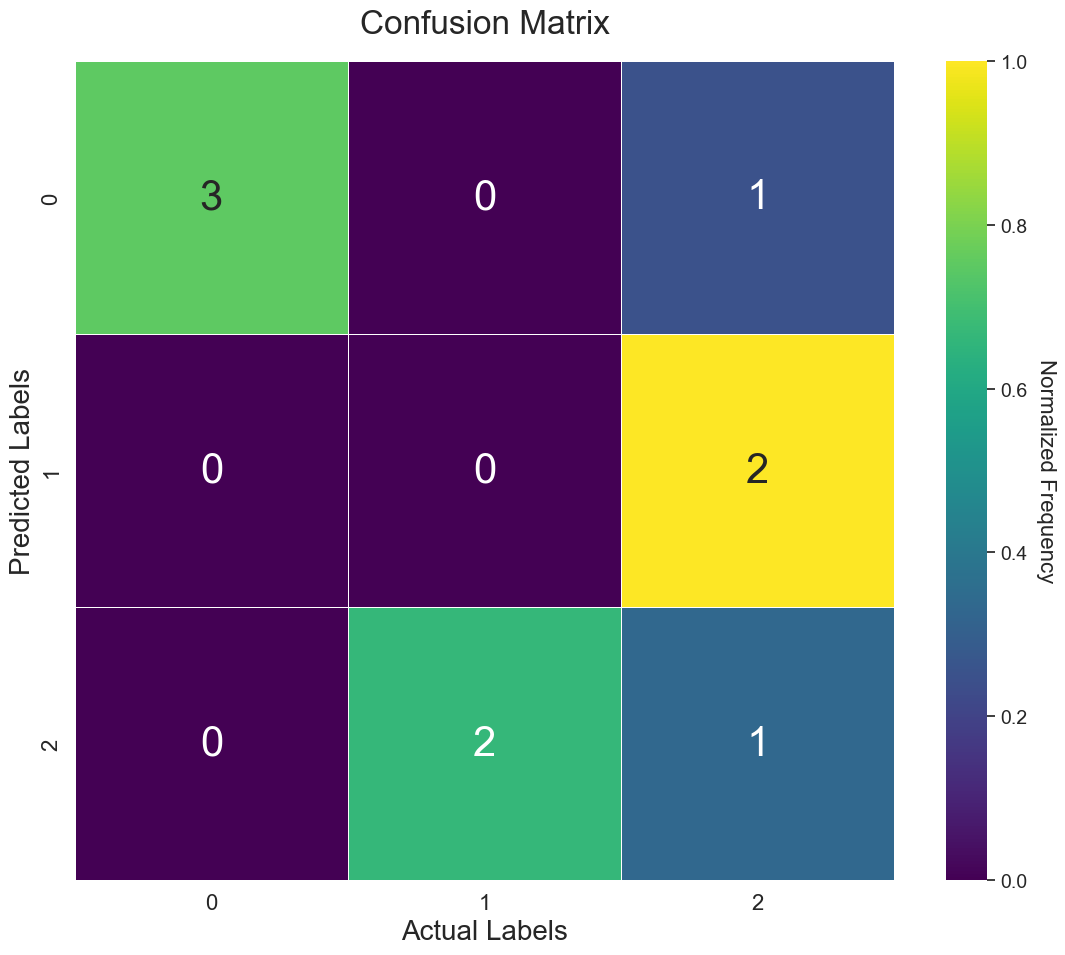

In [61]:
plt.figure(figsize=(12, 10))

# Use 'viridis' colormap for a more colorful display
cmap = plt.cm.viridis

# Normalize the confusion matrix for better color scaling
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create the heatmap
sns.heatmap(cm_norm, annot=cm, fmt='d', cmap=cmap, cbar=True,
            square=True, linewidths=0.5, linecolor='white')

# Improve the colorbar
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=14)
cbar.set_ylabel('Normalized Frequency', rotation=270, labelpad=20, fontsize=16)

# Set labels and title
plt.xlabel('Actual Labels', fontsize=20)
plt.ylabel('Predicted Labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=24, pad=20)

# Adjust tick label size
plt.tick_params(axis='both', which='major', labelsize=16)

# Tight layout to prevent clipping
plt.tight_layout()

plt.show()

In [46]:
def pk(y_true, y_pred, k):
    if k == 0:
        return 0
    y_pred = y_pred[:k]
    pred_set = set(y_pred)
    true_set = set(y_true)
    common_values = pred_set.intersection(true_set)
    return len(common_values) / len(y_pred[:k])

In [47]:
def apk(y_true, y_pred, k):
    pk_values = []
    for i in range(1, k+1):
        pk_values.append(pk(y_true, y_pred, i))
    if len(pk_values) == 0:
        return 0
    return sum(pk_values)/ len(pk_values)

In [48]:
y_true = [[1,2,3],[0,2],[1],[2,3],[1,0],[]]
y_pred = [[0,1,2],[1],[0,2,3],[2,3,4,0],[0,1,2],[0]]

In [50]:
for i in range(len(y_true)):
    for j in range(1,4):
        print (f"""y_true={y_true[i]},y_pred={y_pred[i]},AP@{j}={apk(y_true[i], y_pred[i], k=j)}""")

y_true=[1, 2, 3],y_pred=[0, 1, 2],AP@1=0.0
y_true=[1, 2, 3],y_pred=[0, 1, 2],AP@2=0.25
y_true=[1, 2, 3],y_pred=[0, 1, 2],AP@3=0.38888888888888884
y_true=[0, 2],y_pred=[1],AP@1=0.0
y_true=[0, 2],y_pred=[1],AP@2=0.0
y_true=[0, 2],y_pred=[1],AP@3=0.0
y_true=[1],y_pred=[0, 2, 3],AP@1=0.0
y_true=[1],y_pred=[0, 2, 3],AP@2=0.0
y_true=[1],y_pred=[0, 2, 3],AP@3=0.0
y_true=[2, 3],y_pred=[2, 3, 4, 0],AP@1=1.0
y_true=[2, 3],y_pred=[2, 3, 4, 0],AP@2=1.0
y_true=[2, 3],y_pred=[2, 3, 4, 0],AP@3=0.8888888888888888
y_true=[1, 0],y_pred=[0, 1, 2],AP@1=1.0
y_true=[1, 0],y_pred=[0, 1, 2],AP@2=1.0
y_true=[1, 0],y_pred=[0, 1, 2],AP@3=0.8888888888888888
y_true=[],y_pred=[0],AP@1=0.0
y_true=[],y_pred=[0],AP@2=0.0
y_true=[],y_pred=[0],AP@3=0.0


In [51]:
def mapk(y_true, y_pred, k):
    apk_values = []
    for i in range(len(y_true)):
        apk_values.append(apk(y_true[i], y_pred[i], k=k))
    return sum(apk_values) / len(apk_values)

In [57]:
mapk(y_true, y_pred, k=1)

0.3333333333333333

In [54]:
mapk(y_true, y_pred, k=2)

0.375

In [55]:
mapk(y_true, y_pred, k=3)

0.3611111111111111

In [56]:
mapk(y_true, y_pred, k=4)

0.34722222222222215

# Evalution-metrics in regression
Error = True Value - Predicted Value

In [2]:
def mean_absolute_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error +=np.abs(yt - yp)
    return error / len(y_true)

In [3]:
def mean_squared_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp)**2
    return error / len(y_true)

In [4]:
def mean_squared_log_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (np.log(1+yt) - np.log(1+yp))**2
    return error / len(y_true)

In [5]:
def r2(y_true, y_pred):
    mean_true_value = np.mean(y_true)
    numerator = 0 
    denominator = 0
    for yt, yp in zip(y_true, y_pred):
        numerator += (yt - yp) **2
        denominator += (yt - mean_true_value) **2
    ratio = numrtator / denomenator
    return 1 - ratio